In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = './transaction-data-adhoc-analysis.json'

transaction_df = pd.read_json(data_path)

transaction_df

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24
...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09


In [2]:
transaction_df['month'] = pd.DatetimeIndex(transaction_df['transaction_date']).month

In [3]:
transaction_df[["first_item", "second_item", "third_item"]] = transaction_df["transaction_items"].str.split(";", expand = True)

In [4]:
transaction_df[["brand_name_first", "product_first", "total_number_first"]] = transaction_df["first_item"].str.split(",", expand = True)

transaction_df[["brand_name_second", "product_second", "total_number_second"]] = transaction_df["second_item"].str.split(",", expand = True)

transaction_df[["brand_name_third", "product_third", "total_number_third"]] = transaction_df["third_item"].str.split(",", expand = True)

In [5]:
def remove_char(x):
    characters_to_remove = "() x"
    new_string = x
    
    if x == None:
        return int('0')
    
    else:
        for character in characters_to_remove:
          new_string = new_string.replace(character, "")

    return int(new_string)

transaction_df["updated_total_number_first"] = transaction_df["total_number_first"].apply(lambda x: remove_char(x))

transaction_df["updated_total_number_second"] = transaction_df["total_number_second"].apply(lambda x: remove_char(x))

transaction_df["updated_total_number_third"] = transaction_df["total_number_third"].apply(lambda x: remove_char(x))

In [6]:
conditions_1 = [
    (transaction_df["product_first"] == "Beef Chicharon"),
    (transaction_df["product_first"] == "Gummy Vitamins"),
    (transaction_df["product_first"] == "Gummy Worms"),
    (transaction_df["product_first"] == "Kimchi and Seaweed"),
    (transaction_df["product_first"] == "Nutrional Milk"),
    (transaction_df["product_first"] == "Orange Beans"),
    (transaction_df["product_first"] == "Yummy Vegetables")
]


conditions_2 = [
    (transaction_df["product_second"] == "Beef Chicharon"),
    (transaction_df["product_second"] == "Gummy Vitamins"),
    (transaction_df["product_second"] == "Gummy Worms"),
    (transaction_df["product_second"] == "Kimchi and Seaweed"),
    (transaction_df["product_second"] == "Nutrional Milk"),
    (transaction_df["product_second"] == "Orange Beans"),
    (transaction_df["product_second"] == "Yummy Vegetables")
]

conditions_3 = [
    (transaction_df["product_third"] == "Beef Chicharon"),
    (transaction_df["product_third"] == "Gummy Vitamins"),
    (transaction_df["product_third"] == "Gummy Worms"),
    (transaction_df["product_third"] == "Kimchi and Seaweed"),
    (transaction_df["product_third"] == "Nutrional Milk"),
    (transaction_df["product_third"] == "Orange Beans"),
    (transaction_df["product_third"] == "Yummy Vegetables")
]

values = [1299, 1500, 150, 799, 1990, 199, 500]

transaction_df["Item_Price_1"] = np.select(conditions_1, values)

transaction_df["Item_Price_2"] = np.select(conditions_2, values)

transaction_df["Item_Price_3"] = np.select(conditions_3, values)

transaction_df["Sale_Value_1"] = transaction_df["updated_total_number_first"] * transaction_df["Item_Price_1"]

transaction_df["Sale_Value_2"] = transaction_df["updated_total_number_second"] * transaction_df["Item_Price_2"]

transaction_df["Sale_Value_3"] = transaction_df["updated_total_number_third"] * transaction_df["Item_Price_3"]

transaction_df


,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,month,...,total_number_third,updated_total_number_first,updated_total_number_second,updated_total_number_third,Item_Price_1,Item_Price_2,Item_Price_3,Sale_Value_1,Sale_Value_2,Sale_Value_3
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12,1,...,None,4,0,0,1299,0,0,5196,0,0
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12,1,...,(x1),3,4,1,1299,1990,199,3897,7960,199
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08,1,...,None,3,2,0,1500,500,0,4500,1000,0
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10,1,...,None,1,0,0,500,0,0,500,0,0
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24,1,...,(x1),3,4,1,199,150,1500,597,600,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83031,"96081 Harrison Brooks\nJenniferbury, MA 02124",2019/10/26,christina55@hotmail.com,Tammy Byrd,F,kmcconnell,"Exotic Extras,Kimchi and Seaweed,(x2);HealthyK...",3588,2022/06/05,6,...,None,2,1,0,799,1990,0,1598,1990,0
83032,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Yummy Vegetables,(x1);Exotic Ext...",2095,2022/06/12,6,...,(x4),1,1,4,500,799,199,500,799,796
83033,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"Candy City,Orange Beans,(x4);Candy City,Gummy ...",3396,2022/06/15,6,...,(x4),4,4,4,199,150,500,796,600,2000
83034,428 Kristopher Curve Apt. 206\nMcculloughville...,1913/11/04,melvinschmidt@hotmail.com,Donald Andersen,M,llowe,"HealthyKid 3+,Nutrional Milk,(x2);Candy City,G...",4280,2022/06/09,6,...,None,2,2,0,1990,150,0,3980,300,0


In [7]:
x = transaction_df.groupby(transaction_df["product_first"])["updated_total_number_first"].sum()

y = transaction_df.groupby(transaction_df["product_second"])["updated_total_number_second"].sum()

z = transaction_df.groupby(transaction_df["product_third"])["updated_total_number_third"].sum()

total_final = pd.concat([x, y, z], axis = 1)

In [8]:
x = transaction_df.groupby([transaction_df["month"], transaction_df["product_first"]])[["updated_total_number_first"]].sum()

y = transaction_df.groupby([transaction_df["month"], transaction_df["product_second"]])["updated_total_number_second"].sum()

z = transaction_df.groupby([transaction_df["month"], transaction_df["product_third"]])["updated_total_number_third"].sum()

trial_df = pd.concat([x, y, z], axis=1)



In [9]:
trial_df["sum_all"] = trial_df["updated_total_number_first"] + trial_df["updated_total_number_second"] + trial_df["updated_total_number_third"]

trial_df["sum_all"]


month                    
1      Beef Chicharon         9665
       Gummy Vitamins         9681
       Gummy Worms            9559
       Kimchi and Seaweed     9676
       Nutrional Milk         9727
       Orange Beans           9774
       Yummy Vegetables       9959
2      Beef Chicharon        10001
       Gummy Vitamins         9980
       Gummy Worms            9996
       Kimchi and Seaweed     9949
       Nutrional Milk         9691
       Orange Beans          10037
       Yummy Vegetables      10256
3      Beef Chicharon         9816
       Gummy Vitamins        10145
       Gummy Worms            9986
       Kimchi and Seaweed     9967
       Nutrional Milk         9876
       Orange Beans           9611
       Yummy Vegetables       9896
4      Beef Chicharon         9890
       Gummy Vitamins         9842
       Gummy Worms           10043
       Kimchi and Seaweed     9921
       Nutrional Milk         9786
       Orange Beans           9914
       Yummy Vegetables      

In [10]:
o =transaction_df.groupby([transaction_df["month"],transaction_df["product_first"]])["Sale_Value_1"].sum()

p =transaction_df.groupby([transaction_df["month"],transaction_df["product_second"]])["Sale_Value_2"].sum()

k =transaction_df.groupby([transaction_df["month"],transaction_df["product_third"]])["Sale_Value_3"].sum()

total_sale_pd = pd.concat([o, p, k], axis=1)

In [11]:
final_total_sale = total_sale_pd["Sale_Value_1"] + total_sale_pd["Sale_Value_2"] + total_sale_pd["Sale_Value_3"]

final_total_sale

month                    
1      Beef Chicharon        12554835
       Gummy Vitamins        14521500
       Gummy Worms            1433850
       Kimchi and Seaweed     7731124
       Nutrional Milk        19356730
       Orange Beans           1945026
       Yummy Vegetables       4979500
2      Beef Chicharon        12991299
       Gummy Vitamins        14970000
       Gummy Worms            1499400
       Kimchi and Seaweed     7949251
       Nutrional Milk        19285090
       Orange Beans           1997363
       Yummy Vegetables       5128000
3      Beef Chicharon        12750984
       Gummy Vitamins        15217500
       Gummy Worms            1497900
       Kimchi and Seaweed     7963633
       Nutrional Milk        19653240
       Orange Beans           1912589
       Yummy Vegetables       4948000
4      Beef Chicharon        12847110
       Gummy Vitamins        14763000
       Gummy Worms            1506450
       Kimchi and Seaweed     7926879
       Nutrional Milk   

In [12]:
# Reset

In [13]:
table_df = transaction_df.pivot_table("updated_total_number_first", ["name"], "month", aggfunc="count", fill_value = 0)

table_df["January"] = table_df[1].astype(int)
table_df["February"] = table_df[2].astype(int)
table_df["March"] = table_df[3].astype(int)
table_df["April"] = table_df[4].astype(int)
table_df["May"] = table_df[5].astype(int)
table_df["June"] = table_df[6].astype(int)


In [14]:
def myfunc1(January):
    if January > 0:
        answer1 = "First Purchase"
    else:
        answer1 = "No Transaction"
    return answer1

def myfunc2(January, February):
    if January > 0 and February == 0:
        answer2 = "Inactive"
    elif January > 0 and February > 0:
        answer2 = "Repeater"
    elif January == 0 and February > 0:
        answer2 = "First Purchase"
    elif January == 0 and February == 0:
        answer2 = "No Transaction"
    else:
        answer2 = "Engaged"
    return answer2
        
def myfunc3(January, February, March):
    if January == 0 and February == 0 and March == 0:
        answer3 = "No Transaction"
    elif January == 0 and February > 0 and March > 0:
        answer3 = "Repeater"
    elif January > 0 and February == 0 and March == 0:
        answer3 = "Inactive"
    elif January == 0 and February > 0 and March == 0:
        answer3 = "Inactive"
    elif January > 0 and February > 0 and March == 0:
        answer3 = "Inactive"
    else: 
        answer3 = "Engaged"
    return answer3

def myfunc4(January, February, March, April):
    if January == 0 and February == 0 and March == 0 and April == 0:
        answer4 = "No Transaction"
    elif January == 0 and February > 0 and March > 0 and April > 0:
        answer4 = "Repeater"
    elif January == 0 and February == 0 and March > 0 and April > 0:
        answer4 = "Repeater"
    elif January > 0 and February == 0 and March > 0 and April > 0:
        answer4 = "Repeater"
    elif January > 0 and February == 0 and March == 0 and April == 0:
        answer4 = "Inactive"
    elif January == 0 and February > 0 and March == 0 and April == 0:
        answer4 = "Inactive"
    elif January == 0 and February == 0 and March > 0 and April == 0:
        answer4 = "Inactive"
    elif January > 0 and February > 0 and March == 0 and April == 0:
        answer4 = "Inactive"
    elif January > 0 and February == 0 and March > 0 and April == 0:
        answer4 = "Inactive"
    elif January == 0 and February > 0 and March > 0 and April == 0:
        answer4 = "Inactive"
    elif January > 0 and February > 0 and March > 0 and April == 0:
        answer4 = "Inactive"
    else:
        answer4 = "Engaged"
    return answer4
        
def myfunc5(January, February, March, April, May):
    if January == 0 and February == 0 and March == 0 and April == 0 and May == 0: 
        answer5= "No Transaction"
    elif January > 0 and February == 0 and March == 0 and April > 0 and May > 0:
        answer5= "Repeater"
    elif January == 0 and February > 0 and March == 0 and April > 0 and May > 0:
        answer5= "Repeater"
    elif January == 0 and February == 0 and March > 0 and April > 0 and May > 0:
        answer5= "Repeater"
    elif January > 0 and February > 0 and March == 0 and April > 0 and May > 0:
        answer5= "Repeater"
    elif January > 0 and February == 0 and March > 0 and April > 0 and May > 0:
        answer5= "Repeater"
    elif January == 0 and February > 0 and March > 0 and April > 0 and May > 0:
        answer5= "Repeater"
    elif January == 0 and February == 0 and March == 0 and April > 0 and May > 0:
        answer5= "Repeater"
    #--------------------------------------------------------------------------
    elif January > 0 and February == 0 and March == 0 and April == 0 and May == 0:
        answer5 = "Inactive"
    elif January == 0 and February > 0 and March == 0 and April == 0 and May == 0:
        answer5 = "Inactive"
    elif January == 0 and February == 0 and March > 0 and April == 0 and May == 0:
        answer5 = "Inactive"
    elif January == 0 and February == 0 and March == 0 and April > 0 and May == 0:
        answer5 = "Inactive"
    elif January > 0 and February > 0 and March == 0 and April == 0 and May == 0:
        answer5 = "Inactive"    
    elif January > 0 and February == 0 and March > 0 and April == 0 and May == 0:
        answer5 = "Inactive"
    elif January > 0 and February == 0 and March == 0 and April > 0 and May == 0:
        answer5 = "Inactive"
    elif January == 0 and February > 0 and March > 0 and April == 0 and May == 0:
        answer5 = "Inactive"
    elif January == 0 and February > 0 and March == 0 and April > 0 and May == 0:
        answer5 = "Inactive"
    elif January == 0 and February == 0 and March > 0 and April > 0 and May == 0:
        answer5 = "Inactive"
    elif January == 0 and February > 0 and March > 0 and April > 0 and May == 0:
        answer5 = "Inactive"
    elif January > 0 and February == 0 and March > 0 and April > 0 and May == 0:
        answer5 = "Inactive"
    elif January > 0 and February > 0 and March == 0 and April > 0 and May == 0:
        answer5 = "Inactive"
    elif January > 0 and February > 0 and March > 0 and April == 0 and May == 0:
        answer5 = "Inactive"   
    elif January > 0 and February > 0 and March > 0 and April > 0 and May == 0:
        answer5 = "Inactive"
    else:
        answer5 = "Engaged"
    return answer5
  

def myfunc6(January, February, March, April, May,June):
    if  January == 0 and February == 0 and March == 0 and April == 0 and May == 0 and June == 0:
        answer6 = "No Transaction"
    elif January > 0 and February > 0 and March > 0 and April == 0 and May > 0 and June > 0:
        answer6 = "Repeater"
    elif January > 0 and February > 0 and March == 0 and April == 0 and May > 0 and June > 0:
        answer6 = "Repeater"
    elif January > 0 and February == 0 and March == 0 and April == 0 and May > 0 and June > 0:
        answer6 = "Repeater"
    elif January == 0 and February == 0 and March == 0 and April == 0 and May > 0 and June > 0:
        answer6 = "Repeater"
    elif January == 0 and February == 0 and March == 0 and April > 0 and May > 0 and June > 0:
        answer6 = "Repeater"
    elif January == 0 and February == 0 and March > 0 and April > 0 and May > 0 and June > 0:
        answer6 = "Repeater"
    elif January == 0 and February > 0 and March > 0 and April > 0 and May > 0 and June > 0:
        answer6 = "Repeater"
    elif January == 0 and February > 0 and March > 0 and April == 0 and May > 0 and June > 0:
        answer6 = "Repeater"
    elif January > 0 and February == 0 and March == 0 and April > 0 and May > 0 and June > 0:
        answer6 = "Repeater"
    elif January > 0 and February == 0 and March > 0 and April == 0 and May > 0 and June > 0:
        answer6 = "Repeater"
    elif January == 0 and February > 0 and March == 0 and April > 0 and May > 0 and June > 0:
        answer6 = "Repeater"
    #-------------------------------------------------------------------------------------
    elif January > 0 and February == 0 and March == 0 and April == 0 and May == 0 and June == 0:
        answer6 = "Inactive"
    elif January == 0 and February > 0 and March == 0 and April == 0 and May == 0 and June == 0:
        answer6 = "Inactive"
    elif January == 0 and February == 0 and March > 0 and April == 0 and May == 0 and June == 0:
        answer6 = "Inactive"
    elif January == 0 and February == 0 and March == 0 and April > 0 and May == 0 and June == 0:
        answer6 = "Inactive"
    elif January == 0 and February == 0 and March == 0 and April == 0 and May > 0 and June == 0:
        answer6 = "Inactive"
    elif January > 0 and February > 0 and March == 0 and April == 0 and May == 0 and June == 0:
        answer6 = "Inactive"
    elif January > 0 and February == 0 and March > 0 and April == 0 and May == 0 and June == 0:
        answer6 = "Inactive"
    elif January > 0 and February == 0 and March == 0 and April > 0 and May == 0 and June == 0:
        answer6 = "Inactive"
    elif January > 0 and February == 0 and March == 0 and April == 0 and May > 0 and June == 0:
        answer6 = "Inactive"
    elif January == 0 and February > 0 and March > 0 and April == 0 and May == 0 and June == 0:
        answer6 = "Inactive"
    elif January == 0 and February > 0 and March == 0 and April > 0 and May == 0 and June == 0:
        answer6 = "Inactive"
    elif January == 0 and February > 0 and March == 0 and April == 0 and May > 0 and June == 0:
        answer6 = "Inactive"
    elif January == 0 and February == 0 and March > 0 and April == 0 and May > 0 and June == 0:
        answer6 = "Inactive"
    elif January == 0 and February == 0 and March > 0 and April > 0 and May == 0 and June == 0:
        answer6 = "Inactive"
    elif January == 0 and February == 0 and March == 0 and April > 0 and May > 0 and June == 0:
        answer6 = "Inactive"
    elif January > 0 and February > 0 and March > 0 and April == 0 and May == 0 and June == 0:
        answer6 = "Inactive"
    elif January > 0 and February > 0 and March == 0 and April > 0 and May == 0 and June == 0:
        answer6 = "Inactive"
    elif January > 0 and February > 0 and March == 0 and April == 0 and May > 0 and June == 0:
        answer6 = "Inactive"
    elif January > 0 and February == 0 and March > 0 and April == 0 and May > 0 and June == 0:
        answer6 = "Inactive"
    elif January > 0 and February == 0 and March == 0 and April > 0 and May > 0 and June == 0:
        answer6 = "Inactive"
    elif January == 0 and February == 0 and March > 0 and April > 0 and May > 0 and June == 0:
        answer6 = "Inactive"
    elif January == 0 and February > 0 and March == 0 and April > 0 and May > 0 and June == 0:
        answer6 = "Inactive"
    elif January == 0 and February > 0 and March > 0 and April == 0 and May > 0 and June == 0:
        answer6 = "Inactive"
    elif January == 0 and February > 0 and March > 0 and April > 0 and May == 0 and June == 0:
        answer6 = "Inactive"
    elif January > 0 and February == 0 and March > 0 and April > 0 and May == 0 and June == 0:
        answer6 = "Inactive"
    elif January > 0 and February > 0 and March > 0 and April > 0 and May == 0 and June == 0:
        answer6 = "Inactive"
    elif January > 0 and February > 0 and March > 0 and April == 0 and May > 0 and June == 0:
        answer6 = "Inactive"
    elif January > 0 and February > 0 and March == 0 and April > 0 and May > 0 and June == 0:
        answer6 = "Inactive"
    elif January > 0 and February == 0 and March > 0 and April > 0 and May > 0 and June == 0:
        answer6 = "Inactive"
    elif January == 0 and February > 0 and March > 0 and April > 0 and May > 0 and June == 0:
        answer6 = "Inactive"
    else:
        answer6= "Engaged"
    return answer6

In [15]:
table_df["Purchase_Status_1"] = table_df.apply(lambda x: myfunc1(x["January"]), axis=1)

table_df["Purchase_Status_2"] = table_df.apply(lambda x: myfunc2(x["January"], x["February"]), axis=1)

table_df["Purchase_Status_3"] = table_df.apply(lambda x: myfunc3(x["January"], x["February"], x["March"]), axis=1)

table_df["Purchase_Status_4"] = table_df.apply(lambda x: myfunc4(x["January"], x["February"], x["March"], x["April"]), axis=1)

table_df["Purchase_Status_5"] = table_df.apply(lambda x: myfunc5(x["January"], x["February"], x["March"], x["April"], x["May"]), axis=1)

table_df["Purchase_Status_6"] = table_df.apply(lambda x: myfunc6(x["January"], x["February"], x["March"], x["April"], x["May"],x["June"]), axis=1)

In [16]:

a = table_df.loc[:, "Purchase_Status_1"].value_counts()

b = table_df.loc[:, "Purchase_Status_2"].value_counts()

c = table_df.loc[:, "Purchase_Status_3"].value_counts()

d = table_df.loc[:, "Purchase_Status_4"].value_counts()

e = table_df.loc[:, "Purchase_Status_5"].value_counts()

f = table_df.loc[:, "Purchase_Status_6"].value_counts()

final_df = pd.concat([a, b, c, d, e, f], axis = 1).fillna(0)

final_df.astype(int)



,Purchase_Status_1,Purchase_Status_2,Purchase_Status_3,Purchase_Status_4,Purchase_Status_5,Purchase_Status_6
First Purchase,6588,1459,0,0,0,0
No Transaction,1899,440,118,22,2,0
Repeater,0,5172,1090,1865,2443,1955
Inactive,0,1416,1747,1909,1917,1358
Engaged,0,0,5532,4691,4125,5174


In [17]:
columns = ["Purchase_Status_1", "Purchase_Status_2", "Purchase_Status_3", "Purchase_Status_4", "Purchase_Status_5", "Purchase_Status_6"]
index = ["Repeater", "Inactive", "Engaged"]

customer_status = pd.DataFrame(data=final_df, index = index, columns = columns)
        
customer_status.astype(int)

,Purchase_Status_1,Purchase_Status_2,Purchase_Status_3,Purchase_Status_4,Purchase_Status_5,Purchase_Status_6
Repeater,0,5172,1090,1865,2443,1955
Inactive,0,1416,1747,1909,1917,1358
Engaged,0,0,5532,4691,4125,5174


In [18]:
# Additional Insights

In [19]:
from datetime import datetime, date

def age(born):
    born = datetime.strptime(born, "%Y/%m/%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))

transaction_df["Age"] = transaction_df["birthdate"].apply(age)


transaction_df["Age"].agg("mean")



58.04116286911701

In [20]:
print(transaction_df["transaction_value"].agg("mean"))
print(transaction_df["transaction_value"].agg("max"))
print(transaction_df["transaction_value"].agg("min"))

4590.211137338022
19156
150


<AxesSubplot:>

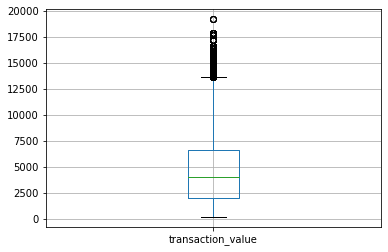

In [21]:
boxplot = transaction_df.boxplot(column = ["transaction_value"])
boxplot